# Project: Bangalore House Price Prediction Model

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")

In [2]:
# reading the excel dataset

df = pd.read_excel("final_processed_data.xlsx")

In [3]:
# checking first 5 columns

df.head()

,Unnamed: 0,title,price,size,price_per_sqft,space,city,locality
0,0,3 BHK Apartment in CasaGrand Casagrand Meridian,11800000.0,2037.0,5793.0,3 BHK,Bangalore,CasaGrand Casagrand Meridian
1,1,2 BHK Apartment in Shree Nandana Elite,5756000.0,1240.0,4642.0,2 BHK,Bangalore,Shree Nandana Elite
2,2,Residential Plot in Saroj Whispering Winds,3230000.0,2000.0,1615.0,Residential Plot,Bangalore,Saroj Whispering Winds
3,3,3 BHK Apartment in Navami Landmaark,13300000.0,1641.0,8133.0,3 BHK,Bangalore,Navami Landmaark
4,4,2 BHK Apartment in V Venture EVA,5532000.0,957.0,5787.0,2 BHK,Bangalore,V Venture EVA


In [4]:
# checking the last 5 columns

df.tail()

,Unnamed: 0,title,price,size,price_per_sqft,space,city,locality
47997,47997,My Home Vihanga 3 BHK Flat Gachibowli,1.850000e+07,1835.000000,1.008174e+04,3 BHK,Gachibowli,My Home Vihanga
47998,47998,Pacifica Hillcrest Phase 2 3 BHK Flat Gachi...,1.270000e+07,2061.000000,6.162057e+03,3 BHK,Gachibowli,Pacifica Hillcrest Phase 2
47999,47999,Pacifica Hillcrest Phase 1 2 BHK Flat Gachi...,1.200000e+07,886.000000,1.354402e+04,2 BHK,Gachibowli,Pacifica Hillcrest Phase 1
48000,48000,Gachibowli County Office Space in IT/SEZ Gac...,4.760000e+09,2048.266082,2.323917e+06,Unknown,Gachibowli,Gachibowli County
48001,48001,Prestige High Fields 2 BHK Flat Gachibowli,1.380000e+07,892.000000,1.547085e+04,2 BHK,Gachibowli,Prestige High Fields


In [5]:
# cheking the shape of the dataset

df.shape

(48002, 8)

In [6]:
# removing the unnecessary column Unnamed: 0 and status

df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.head(3)

,title,price,size,price_per_sqft,space,city,locality
0,3 BHK Apartment in CasaGrand Casagrand Meridian,11800000.0,2037.0,5793.0,3 BHK,Bangalore,CasaGrand Casagrand Meridian
1,2 BHK Apartment in Shree Nandana Elite,5756000.0,1240.0,4642.0,2 BHK,Bangalore,Shree Nandana Elite
2,Residential Plot in Saroj Whispering Winds,3230000.0,2000.0,1615.0,Residential Plot,Bangalore,Saroj Whispering Winds


In [8]:
# getting the overall statistics of our data

df.describe()

,price,size,price_per_sqft
count,4.800200e+04,4.800200e+04,4.799900e+04
mean,8.996362e+07,1.895567e+03,4.350742e+04
std,6.447416e+08,1.115090e+04,2.506093e+05
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.450000e+06,1.160000e+03,4.500000e+03
50%,8.500000e+06,1.370000e+03,6.050000e+03
75%,1.700000e+07,1.849000e+03,8.990000e+03
max,7.695000e+10,1.350011e+06,2.700000e+07


In [9]:
# getting the overall information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48002 entries, 0 to 48001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           47999 non-null  object 
 1   price           48002 non-null  float64
 2   size            48002 non-null  float64
 3   price_per_sqft  47999 non-null  float64
 4   space           48002 non-null  object 
 5   city            48002 non-null  object 
 6   locality        48001 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.6+ MB


## Data Cleaning and Preprocessing

In [10]:
# checking for duplicates in the data

df.duplicated().sum()

6

In [11]:
# dropping the duplicated datas

df = df.drop_duplicates()

In [12]:
# resetting the index of the DataFrame

df.reset_index(drop=True, inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# checking for null values

df.isnull().sum()

title             3
price             0
size              0
price_per_sqft    3
space             0
city              0
locality          1
dtype: int64

### Note
- It is clearly noticable that size, price_per_sqft and status columns have empty data in them.
- So we will need to remove those empty data so that our ML model works efficiently

### Filling up the null values in the size column

In [15]:
#replacing the " sqrt" term from the size column

# df['size'] = df['size'].str.replace(' sqft| Sq.Ft.', '')

In [16]:
# df['size']

In [17]:
# # Convert the column to a numeric data type
# df['size'] = pd.to_numeric(df['size'], errors='coerce')

# # Calculate the mean, excluding NaN values
# column_mean = df['size'].mean(skipna=True)

# # Checking the mean value
# print(column_mean)

In [18]:
# df['size'].fillna(column_mean, inplace=True)

In [19]:
# dropping the other null values

df = df.dropna()

In [20]:
df.isnull().sum()

title             0
price             0
size              0
price_per_sqft    0
space             0
city              0
locality          0
dtype: int64

### Converting word price to numeric values

In [21]:
df['price'] = df['price'].astype(str)

In [22]:
df['price'] = df['price'].str.replace('₹', '')

In [23]:
def convert_value(value):
    if 'Cr' in value:
        return float(value.replace(' Cr', '')) * 10000000
    elif 'Lac' in value:
        return float(value.replace(' Lac', '')) * 100000
    elif 'L' in value:
        return float(value.replace(' L', '')) * 100000
    elif 'ac' in value:
        return float(value.replace('ac', '')) * 100000
    elif 'Call for Price' in value:
        return float(value.replace('Call for Price', '0')) * 0
    elif 'Price on Request' in value:
        return float(value.replace('Price on Request', '0')) * 0
    else:
        return float(value)

pd.options.display.float_format = '{:.2f}'.format
df['price'] = df['price'].apply(convert_value)

In [24]:
df.head(3)

,title,price,size,price_per_sqft,space,city,locality
0,3 BHK Apartment in CasaGrand Casagrand Meridian,11800000.00,2037.00,5793.00,3 BHK,Bangalore,CasaGrand Casagrand Meridian
1,2 BHK Apartment in Shree Nandana Elite,5756000.00,1240.00,4642.00,2 BHK,Bangalore,Shree Nandana Elite
2,Residential Plot in Saroj Whispering Winds,3230000.00,2000.00,1615.00,Residential Plot,Bangalore,Saroj Whispering Winds


In [25]:
# df.info()

### Preprocessing the price_per_sqft column of the DataFrame

In [26]:
#removing the unnecessary symbols

# df['price_per_sqft'] = df['price_per_sqft'].str.replace(' / sq ft', '')
# df['price_per_sqft'] = df['price_per_sqft'].str.replace(' per sqft', '')
# df['price_per_sqft'] = df['price_per_sqft'].str.replace('₹', '')
# df['price_per_sqft'] = df['price_per_sqft'].str.replace(',', '')

In [27]:
#calculating the price_per_sqft to fill in the null values

# def calculate_price_per_sqft(row):
#     if pd.isna(row['price_per_sqft']):
#         if row['price'] == 0:
#             return 0
#         else:
#             return row['price'] / row['size']
#     else:
#         return row['price_per_sqft']

# pd.options.display.float_format = '{:.2f}'.format
# df['price_per_sqft'] = df.apply(calculate_price_per_sqft, axis=1)


In [28]:
#converting price_per_sqft to float Dtype

# df['price_per_sqft']=df['price_per_sqft'].astype(float)

- <b><i> after bringing all the data to the standard format, we will check for duplicates again </i> </b>

In [29]:
df.duplicated().sum()

0

In [30]:
# dropping the duplicates
df = df.drop_duplicates()

In [31]:
# dropping the values for which price is 0

df = df.drop(df[df['price'] == 0].index)

In [32]:
df.shape

(47935, 7)

In [33]:
df.reset_index(drop=True, inplace=True)

In [34]:
df.tail()

,title,price,size,price_per_sqft,space,city,locality
47930,My Home Vihanga 3 BHK Flat Gachibowli,18500000.00,1835.00,10081.74,3 BHK,Gachibowli,My Home Vihanga
47931,Pacifica Hillcrest Phase 2 3 BHK Flat Gachi...,12700000.00,2061.00,6162.06,3 BHK,Gachibowli,Pacifica Hillcrest Phase 2
47932,Pacifica Hillcrest Phase 1 2 BHK Flat Gachi...,12000000.00,886.00,13544.02,2 BHK,Gachibowli,Pacifica Hillcrest Phase 1
47933,Gachibowli County Office Space in IT/SEZ Gac...,4760000000.00,2048.27,2323916.82,Unknown,Gachibowli,Gachibowli County
47934,Prestige High Fields 2 BHK Flat Gachibowli,13800000.00,892.00,15470.85,2 BHK,Gachibowli,Prestige High Fields


In [35]:
df.drop('title', axis=1, inplace=True)

### Saving the processed and clean data into another excel sheet

In [36]:
# df.to_excel('ready_for_EDA.xlsx')

<h1><b>Exploratory Data Analysis</b></h1>

In [37]:
def extract_size(space_value):
    if 'BHK' in space_value:
        size = space_value.split(' ')[0]
        if size.isdigit():
            return int(size)
        else:
            return 0
    elif 'Bedroom' in space_value:
        size = space_value.split(' ')[0]
        if size.isdigit():
            return int(size)
        else:
            return 0
    elif 'Residential' in space_value:
        return 'Residential'
    elif 'Unknown' in space_value:
        return 'Unknown'
    elif '+ ' in space_value:
        return '6+'
    else:
        return 0

In [38]:
df['BHK'] = df['space'].apply(extract_size)

In [39]:
df['BHK'].value_counts()

3              15430
2              14819
Residential     6034
4               4299
0               3811
1               1452
5               1162
6                421
7                203
8                165
9                 97
Unknown           42
Name: BHK, dtype: int64

In [40]:
df.head()

,price,size,price_per_sqft,space,city,locality,BHK
0,11800000.00,2037.00,5793.00,3 BHK,Bangalore,CasaGrand Casagrand Meridian,3
1,5756000.00,1240.00,4642.00,2 BHK,Bangalore,Shree Nandana Elite,2
2,3230000.00,2000.00,1615.00,Residential Plot,Bangalore,Saroj Whispering Winds,Residential
3,13300000.00,1641.00,8133.00,3 BHK,Bangalore,Navami Landmaark,3
4,5532000.00,957.00,5787.00,2 BHK,Bangalore,V Venture EVA,2


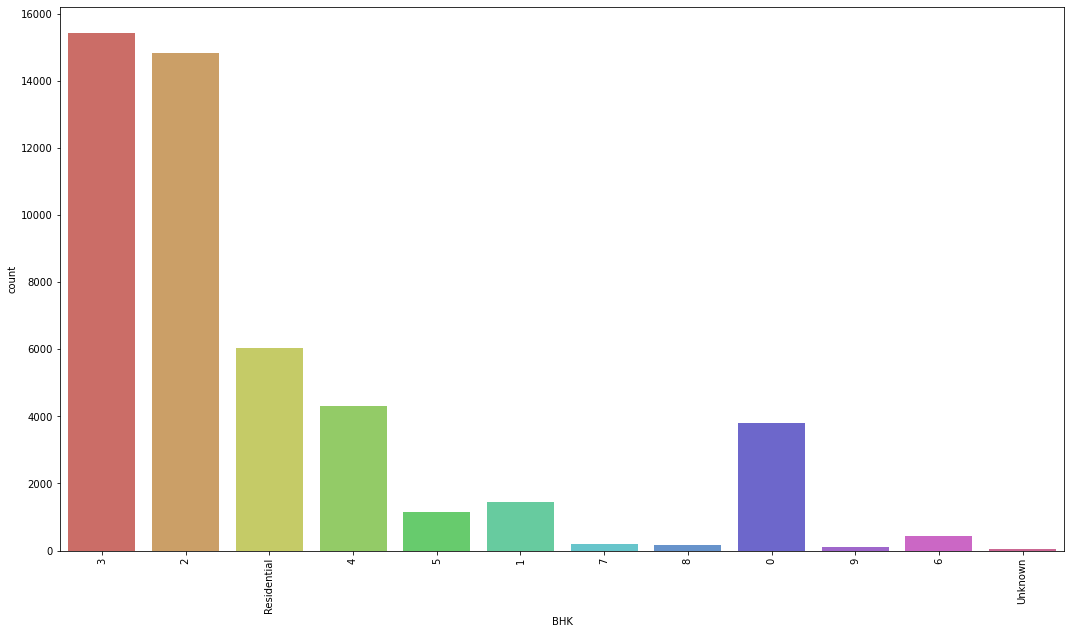

In [42]:
plt.figure(figsize=(18,10))
sns.countplot('BHK', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()